In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes

In [9]:
df=pd.read_csv("diabetes.csv")

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

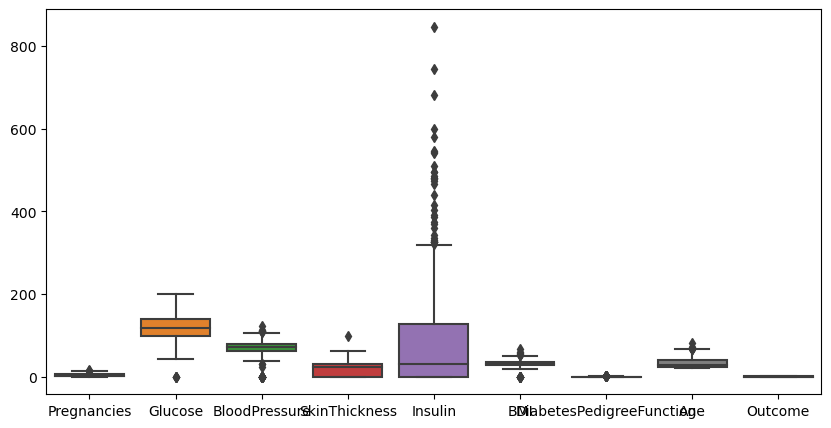

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

In [18]:
df['Glucose'].replace(0,df['Glucose'].median(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)

df['Insulin'].replace(0,df['Insulin'].median(),inplace=True)
df['BMI'].replace(0,df['BMI'].median(),inplace=True)

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [25]:
scaler=StandardScaler()

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=.2)

In [29]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clss=DecisionTreeClassifier()

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [96]:
clf=GridSearchCV(clss,param_grid=parameter,cv=5,scoring='accuracy')

In [97]:
clf.fit(x_train_scaled,y_train)

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [131]:
clf.best_score_

0.7572837531654004

In [101]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(criterion='log_loss',
                                        max_depth=4,
                                        max_features='log2',
                                        splitter='random')

In [102]:
classification=classification.fit(x_train_scaled,y_train)

In [103]:
y_pred=classification.predict(x_test_scaled)

In [104]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [106]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       126
           1       0.33      0.71      0.45        28

    accuracy                           0.69       154
   macro avg       0.62      0.70      0.62       154
weighted avg       0.81      0.69      0.72       154

[[86 40]
 [ 8 20]]
68.83116883116884


In [107]:
confusion_matrix(y_pred,y_test)[0]

array([86, 40])

In [108]:
sum(sum(confusion_matrix(y_pred,y_test)))

154

In [111]:
Precision=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[0][1]),2)
Accuracy=round((confusion_matrix(y_pred,y_test)[0][0]
          +confusion_matrix(y_pred,y_test)[0][1])*100/sum(sum(confusion_matrix(y_pred,y_test))),2)
Recall=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[1][0]),2)

F1_Score=round(2*Precision*Recall/(Recall+Precision),2)


In [112]:
print(Precision,Accuracy,Recall,F1_Score)

68.25 81.82 91.49 78.18


In [117]:
from sklearn.svm import SVC

In [119]:
support_vector_classifier=SVC()

In [122]:
parameter={'C':[.1,1,10,100,1000],
            'gamma':[1,.01,.001,.001,.0001]
            ,'kernel':['rbf']}

In [124]:
GSC=GridSearchCV(support_vector_classifier,param_grid=parameter,cv=5)

In [127]:
GSC=GSC.fit(x_train_scaled,y_train)

In [129]:
GSC.best_score_

0.7865920298547249

In [130]:
GSC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [134]:
support_vector_classifier=SVC(C= 100, gamma=0.001, kernel= 'rbf')

In [142]:
support_vector_classifier=support_vector_classifier.fit(x_train_scaled,y_train)

In [143]:
y_pred=support_vector_classifier.predict(x_test_scaled)

In [144]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       114
           1       0.52      0.78      0.62        40

    accuracy                           0.75       154
   macro avg       0.71      0.76      0.72       154
weighted avg       0.80      0.75      0.77       154

[[85 29]
 [ 9 31]]
75.32467532467533


In [145]:
Precision=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[0][1]),2)
Accuracy=round((confusion_matrix(y_pred,y_test)[0][0]
          +confusion_matrix(y_pred,y_test)[0][1])*100/sum(sum(confusion_matrix(y_pred,y_test))),2)
Recall=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[1][0]),2)

F1_Score=round(2*Precision*Recall/(Recall+Precision),2)


In [146]:
print(Precision,Accuracy,Recall,F1_Score)

74.56 74.03 90.43 81.73


# Naive Bayes Implementation

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
gaussion=GaussianNB()

In [150]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [151]:
gvc_gaussion=GridSearchCV(gaussion,param_grid_nb,cv=5)

In [154]:
gvc_gaussion=gvc_gaussion.fit(x_train_scaled,y_train)

In [156]:
gvc_gaussion.best_params_

{'var_smoothing': 0.43287612810830584}

In [158]:
gaussion_nb=GaussianNB(var_smoothing= 0.43287612810830584)

In [159]:
gaussion_nb=gaussion_nb.fit(x_train_scaled,y_train)

In [160]:
y_pred=gaussion_nb.predict(x_test_scaled)

In [161]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       118
           1       0.40      0.67      0.50        36

    accuracy                           0.69       154
   macro avg       0.64      0.68      0.64       154
weighted avg       0.76      0.69      0.71       154

[[82 36]
 [12 24]]
68.83116883116884


In [162]:
Precision=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[0][1]),2)
Accuracy=round((confusion_matrix(y_pred,y_test)[0][0]
          +confusion_matrix(y_pred,y_test)[0][1])*100/sum(sum(confusion_matrix(y_pred,y_test))),2)
Recall=round(confusion_matrix(y_pred,y_test)[0][0]*100/(confusion_matrix(y_pred,y_test)[0][0]
                                                 +confusion_matrix(y_pred,y_test)[1][0]),2)

F1_Score=round(2*Precision*Recall/(Recall+Precision),2)


In [163]:
print(Precision,Accuracy,Recall,F1_Score)

69.49 76.62 87.23 77.36


# LogisticRegression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
LogisticRegression()

LogisticRegression()

In [168]:
import pickle

In [171]:
pickle.dump(scaler, open('Standard_scaler.pkl', 'wb'))

In [172]:
pickle.dump(support_vector_classifier, open('support_vector_classifier.pkl', 'wb'))

In [177]:
with open('support_vector_classifier.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)